In [1]:
!pip install mlxtend

In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import KFold
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix

In [3]:
# cd D:\Group-7

In [4]:
#retrieving data
parkingdata = pd.read_csv("parking_duration_of_parking_event_vs_street_ID.csv")
parkingdata = parkingdata.sample(n = 10000)
parkingdata.size

130000

In [5]:
parkingdata.head(5)

,Area Name,Street Name,Between Street 1,Between Street 2,Side Of Street,Street Marker,Arrival Time,Departure Time,Duration of Parking Event (in seconds),Sign,In Violation?,Street ID,Device ID
3751983,Regency,Lt LONSDALE STREET,EXHIBITION STREET,SPRING STREET,4,3345S,17/01/2012 01:08:49 PM,17/01/2012 01:23:45 PM,896,2P MTR M-SAT 7:30-20:30,0,926,1695
8720412,Jolimont,LANSDOWNE STREET,ALBERT STREET,CATHEDRAL PLACE,2,11886E,18/06/2012 09:00:48 AM,18/06/2012 09:30:22 AM,1774,2P MTR M-F 7:30-18:30,0,869,6312
10143549,Banks,WILLIAM STREET,COLLINS STREET,FLINDERS LANE,5,1297W,30/07/2012 11:58:17 AM,30/07/2012 12:00:13 PM,116,1P MTR M-F 9:30-16:00,0,1428,975
1749009,Rialto,BOURKE STREET,KING STREET,WILLIAM STREET,3,2466N,18/11/2011 11:50:40 AM,18/11/2011 11:53:36 AM,176,1P MTR M-SAT 7:30-19:30,0,123,1409
10872999,Rialto,COLLINS STREET,KING STREET,WILLIAM STREET,4,2041S,21/08/2012 10:06:33 AM,21/08/2012 10:07:38 AM,65,1/2P M-SAT 7:30-19:30,0,528,1293


In [6]:
parkingdata.tail(5)

,Area Name,Street Name,Between Street 1,Between Street 2,Side Of Street,Street Marker,Arrival Time,Departure Time,Duration of Parking Event (in seconds),Sign,In Violation?,Street ID,Device ID
83847,Queensberry,LEVESON STREET,QUEENSBERRY STREET,VICTORIA STREET,2,6314E,04/10/2011 10:34:11 AM,04/10/2011 10:39:13 AM,302,1P TKT A M-F 7:30-18:30,0,881,3729
4403593,City Square,FLINDERS LANE,SWANSTON STREET,RUSSELL STREET,4,1765S,05/02/2012 08:21:36 PM,05/02/2012 08:23:53 PM,137,P10 M-SUN 0:00-23:59,0,669,1432
10247480,Magistrates,LA TROBE STREET,KING STREET,WILLIAM STREET,3,3916N,02/08/2012 09:17:07 AM,02/08/2012 09:18:54 AM,107,2P TKT A M-SAT 7:30-20:30,0,856,2236
9802421,Jolimont,LANSDOWNE STREET,ALBERT STREET,CATHEDRAL PLACE,2,11868E,19/07/2012 02:24:21 PM,19/07/2012 02:37:22 PM,781,2P MTR M-F 7:30-18:30,0,869,6295
6474518,Chinatown,RUSSELL STREET,LONSDALE STREET,Lt BOURKE STREET,1,C806,08/04/2012 01:59:24 PM,08/04/2012 02:21:52 PM,1348,1P SUN 7:30-18:30,0,1221,4856


## Data Wrangling

In [7]:
#checking the datatype of all the features
parkingdata.dtypes

Area Name                                 object
Street Name                               object
Between Street 1                          object
Between Street 2                          object
Side Of Street                             int64
Street Marker                             object
Arrival Time                              object
Departure Time                            object
Duration of Parking Event (in seconds)     int64
Sign                                      object
In Violation?                              int64
Street ID                                  int64
Device ID                                  int64
dtype: object

In [8]:
#Checking values of Area Name feature for typos
parkingdata['Area Name'].value_counts()

Queensberry        1102
Princes Theatre     716
Victoria Market     651
Regency             640
The Mac             636
Southbank           631
Hyatt               577
Titles              532
Rialto              474
City Square         434
Chinatown           424
Hardware            398
Courtney            395
County              395
Magistrates         373
Spencer             361
Banks               352
RACV                332
Jolimont            289
Supreme             200
Docklands            52
Tavistock            34
West Melbourne        2
Name: Area Name, dtype: int64

In [9]:
#Converting all the feature attributes to uppercase for uniformity

parkingdata['Area Name'] = parkingdata['Area Name'].str.upper()
parkingdata['Street Name'] = parkingdata['Street Name'].str.upper()
parkingdata['Between Street 1'] = parkingdata['Between Street 1'].str.upper()
parkingdata['Between Street 2'] = parkingdata['Between Street 2'].str.upper()
parkingdata['Street Marker'] = parkingdata['Street Marker'].str.upper()
parkingdata['Sign'] = parkingdata['Sign'].str.upper()

parkingdata.head(5)

,Area Name,Street Name,Between Street 1,Between Street 2,Side Of Street,Street Marker,Arrival Time,Departure Time,Duration of Parking Event (in seconds),Sign,In Violation?,Street ID,Device ID
3751983,REGENCY,LT LONSDALE STREET,EXHIBITION STREET,SPRING STREET,4,3345S,17/01/2012 01:08:49 PM,17/01/2012 01:23:45 PM,896,2P MTR M-SAT 7:30-20:30,0,926,1695
8720412,JOLIMONT,LANSDOWNE STREET,ALBERT STREET,CATHEDRAL PLACE,2,11886E,18/06/2012 09:00:48 AM,18/06/2012 09:30:22 AM,1774,2P MTR M-F 7:30-18:30,0,869,6312
10143549,BANKS,WILLIAM STREET,COLLINS STREET,FLINDERS LANE,5,1297W,30/07/2012 11:58:17 AM,30/07/2012 12:00:13 PM,116,1P MTR M-F 9:30-16:00,0,1428,975
1749009,RIALTO,BOURKE STREET,KING STREET,WILLIAM STREET,3,2466N,18/11/2011 11:50:40 AM,18/11/2011 11:53:36 AM,176,1P MTR M-SAT 7:30-19:30,0,123,1409
10872999,RIALTO,COLLINS STREET,KING STREET,WILLIAM STREET,4,2041S,21/08/2012 10:06:33 AM,21/08/2012 10:07:38 AM,65,1/2P M-SAT 7:30-19:30,0,528,1293


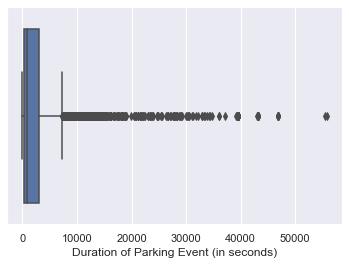

In [10]:
sns.boxplot(parkingdata['Duration of Parking Event (in seconds)'])


In [11]:
#Removing all redundant extra whitespaces
for x in parkingdata.columns:
    if parkingdata[x].dtype == object:
        parkingdata[x] = parkingdata[x].str.strip()

In [12]:
#Checking values of Street Name feature for typos
pd.set_option('display.max_rows', 10000)
parkingdata['Street Name'].value_counts()

LONSDALE STREET             925
QUEEN STREET                730
EXHIBITION STREET           589
LA TROBE STREET             574
FRANKLIN STREET             552
ELIZABETH STREET            511
COLLINS STREET              499
RUSSELL STREET              477
BOURKE STREET               416
LT LONSDALE STREET          334
LT COLLINS STREET           318
FLINDERS LANE               273
SPRING STREET               264
KING STREET                 261
ERROL STREET                238
WILLIAM STREET              208
LT BOURKE STREET            182
VICTORIA STREET             168
COVENTRY STREET             162
A'BECKETT STREET            135
QUEENSBERRY STREET          129
SPENCER STREET              129
FLINDERS STREET             122
CAPEL STREET                120
ALBERT STREET                89
GRANT STREET                 88
THERRY STREET                84
COBDEN STREET                80
DORCAS STREET                80
O'CONNELL STREET             76
LEVESON STREET               75
KAVANAGH

In [13]:
#Checking values of Between Street 1 feature for typos
parkingdata['Between Street 1'].value_counts()

KING STREET            916
QUEEN STREET           793
QUEENSBERRY STREET     672
WILLIAM STREET         609
RUSSELL STREET         532
SWANSTON STREET        493
SPENCER STREET         484
EXHIBITION STREET      439
LT LONSDALE STREET     424
LONSDALE STREET        362
LT COLLINS STREET      350
VICTORIA STREET        339
BOURKE STREET          305
COLLINS STREET         294
ELIZABETH STREET       258
LT BOURKE STREET       254
FLINDERS LANE          187
LA TROBE STREET        187
WILLAM STREET          148
FRANKLIN STREET        141
A'BECKETT STREET       127
WELLS STREET           124
THERRY STREET          105
DODDS STREET           104
ERROL STREET            95
SOUTHBANK BOULEVARD     91
O'CONNELL STREET        88
FLINDERS STREET         87
KINGS WAY               86
STURT STREET            80
HOWARD STREET           67
COBDEN STREET           59
VICTORIA PARADE         56
ALBERT STREET           54
BALSTON STREET          52
PELHAM STREET           51
MACARTHUR STREET        43
P

In [14]:
#Checking values of Between Street 1 feature for typos
parkingdata['Between Street 2'].value_counts()

WILLIAM STREET         872
VICTORIA STREET        863
ELIZABETH STREET       813
QUEEN STREET           746
EXHIBITION STREET      521
KING STREET            484
LONSDALE STREET        451
SPRING STREET          447
RUSSELL STREET         406
FLINDERS LANE          381
LT BOURKE STREET       362
COLLINS STREET         350
LT COLLINS STREET      305
SWANSTON STREET        258
BOURKE STREET          254
LA TROBE STREET        249
LT LONSDALE STREET     216
FLINDERS STREET        187
DODDS STREET           132
ST KILDA ROAD          124
FRANKLIN STREET        105
LANSDOWNE STREET       102
LEVESON STREET          95
POWER STREET            87
A'BECKETT STREET        83
QUEENSBERRY STREET      78
HAWKE STREET            73
THERRY STREET           71
WELLS STREET            67
WALSH STREET            66
CAPEL STREET            64
STURT STREET            53
MILES STREET            41
KAVANAGH STREET         40
ELM STREET              39
STANLEY STREET          37
CATHEDRAL PLACE         36
D

In [15]:
#check which columns have missing values
parkingdata.columns[parkingdata.isnull().any()]

Index([], dtype='object')

In [16]:
#converting object to datetime
parkingdata['Arrival Time'] = pd.to_datetime(parkingdata['Arrival Time'])
parkingdata['Departure Time'] = pd.to_datetime(parkingdata['Departure Time'])

In [17]:
#check if object has successfully been converted to datetime
parkingdata.dtypes

Area Name                                         object
Street Name                                       object
Between Street 1                                  object
Between Street 2                                  object
Side Of Street                                     int64
Street Marker                                     object
Arrival Time                              datetime64[ns]
Departure Time                            datetime64[ns]
Duration of Parking Event (in seconds)             int64
Sign                                              object
In Violation?                                      int64
Street ID                                          int64
Device ID                                          int64
dtype: object

In [18]:
parkingdata.head(5)

,Area Name,Street Name,Between Street 1,Between Street 2,Side Of Street,Street Marker,Arrival Time,Departure Time,Duration of Parking Event (in seconds),Sign,In Violation?,Street ID,Device ID
3751983,REGENCY,LT LONSDALE STREET,EXHIBITION STREET,SPRING STREET,4,3345S,2012-01-17 13:08:49,2012-01-17 13:23:45,896,2P MTR M-SAT 7:30-20:30,0,926,1695
8720412,JOLIMONT,LANSDOWNE STREET,ALBERT STREET,CATHEDRAL PLACE,2,11886E,2012-06-18 09:00:48,2012-06-18 09:30:22,1774,2P MTR M-F 7:30-18:30,0,869,6312
10143549,BANKS,WILLIAM STREET,COLLINS STREET,FLINDERS LANE,5,1297W,2012-07-30 11:58:17,2012-07-30 12:00:13,116,1P MTR M-F 9:30-16:00,0,1428,975
1749009,RIALTO,BOURKE STREET,KING STREET,WILLIAM STREET,3,2466N,2011-11-18 11:50:40,2011-11-18 11:53:36,176,1P MTR M-SAT 7:30-19:30,0,123,1409
10872999,RIALTO,COLLINS STREET,KING STREET,WILLIAM STREET,4,2041S,2012-08-21 10:06:33,2012-08-21 10:07:38,65,1/2P M-SAT 7:30-19:30,0,528,1293


In [19]:
parkingdata.tail(5)

,Area Name,Street Name,Between Street 1,Between Street 2,Side Of Street,Street Marker,Arrival Time,Departure Time,Duration of Parking Event (in seconds),Sign,In Violation?,Street ID,Device ID
83847,QUEENSBERRY,LEVESON STREET,QUEENSBERRY STREET,VICTORIA STREET,2,6314E,2011-04-10 10:34:11,2011-04-10 10:39:13,302,1P TKT A M-F 7:30-18:30,0,881,3729
4403593,CITY SQUARE,FLINDERS LANE,SWANSTON STREET,RUSSELL STREET,4,1765S,2012-05-02 20:21:36,2012-05-02 20:23:53,137,P10 M-SUN 0:00-23:59,0,669,1432
10247480,MAGISTRATES,LA TROBE STREET,KING STREET,WILLIAM STREET,3,3916N,2012-02-08 09:17:07,2012-02-08 09:18:54,107,2P TKT A M-SAT 7:30-20:30,0,856,2236
9802421,JOLIMONT,LANSDOWNE STREET,ALBERT STREET,CATHEDRAL PLACE,2,11868E,2012-07-19 14:24:21,2012-07-19 14:37:22,781,2P MTR M-F 7:30-18:30,0,869,6295
6474518,CHINATOWN,RUSSELL STREET,LONSDALE STREET,LT BOURKE STREET,1,C806,2012-08-04 13:59:24,2012-08-04 14:21:52,1348,1P SUN 7:30-18:30,0,1221,4856


### KNN Classification Model on Predicitive Analytics question 3

In [20]:
#Target field identification
target = parkingdata['Street Name']

unique_vals = target.unique()
target.replace(to_replace = unique_vals, value = list(range(len(unique_vals))), inplace = True)

target.head(10)

3751983     0
8720412     1
10143549    2
1749009     3
10872999    4
5424097     5
8269945     6
238556      7
11451854    8
10479919    9
Name: Street Name, dtype: int64

In [21]:
#Preliminary Target Features identification (Pre-Hill Climbing)

#Convert possible targets to dtype = int
intDf = parkingdata.copy()
#Drop useless fields
intDf.drop('Arrival Time', axis = 1, inplace = True)
intDf.drop('Departure Time', axis = 1, inplace = True)
intDf.drop('Street Marker', axis = 1, inplace = True)
#Drop target field
intDf.drop('Street Name', axis = 1, inplace = True)
#Drop already int fields (Will add back after)
intDf.drop('In Violation?', axis = 1, inplace = True)
intDf.drop('Side Of Street', axis = 1, inplace = True)
intDf.drop('Duration of Parking Event (in seconds)', axis = 1, inplace = True)
intDf.drop('Street ID', axis = 1, inplace = True)
intDf.drop('Device ID', axis = 1, inplace = True)

#Transform the remainder non-int fields' values to unique int identifiers
for column in intDf:
    unique_vals = intDf[column].unique()
    intDf[column].replace(to_replace = unique_vals, value = list(range(len(unique_vals))), inplace = True)

#Create dataframe for all the relevant features
features = intDf.copy()

#Add back int fields (If not the target field)
features['In Violation?'] = parkingdata['In Violation?']
features['Side Of Street'] = parkingdata['Side Of Street']
features['Duration of Parking Event (in seconds)'] = parkingdata['Duration of Parking Event (in seconds)']
features['Street ID'] = parkingdata['Street ID']
features['Device ID'] = parkingdata['Device ID']
#Add back datetime features with only the meaningful subset of data
features['Arrival Hour'] = parkingdata['Arrival Time'].dt.hour
features['Departure Hour'] = parkingdata['Departure Time'].dt.hour

#Table view of features dataframe
features.head(10)

,Area Name,Between Street 1,Between Street 2,Sign,In Violation?,Side Of Street,Duration of Parking Event (in seconds),Street ID,Device ID,Arrival Hour,Departure Hour
3751983,0,0,0,0,0,4,896,926,1695,13,13
8720412,1,1,1,1,0,2,1774,869,6312,9,9
10143549,2,2,2,2,0,5,116,1428,975,11,12
1749009,3,3,3,3,0,3,176,123,1409,11,11
10872999,3,3,3,4,0,4,65,528,1293,10,10
5424097,4,4,4,3,0,1,2615,894,1973,18,19
8269945,5,5,5,5,0,4,2729,547,4389,10,11
238556,6,6,6,6,0,5,85,1329,3524,19,19
11451854,3,7,7,3,0,5,2008,200,7682,12,13
10479919,7,8,8,3,0,3,101,681,7338,9,9


In [22]:
#Parameter Tuning

#Define the parameters to tune and the values to tune to
params_KNN = {'n_neighbors': list(range(1, 10)), 
              'weights': ['uniform', 'distance'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'leaf_size': list(range(10, 50, 5)),
              'p': [1, 2, 5]
             }

In [23]:
#Create the Grid Search to go through the model parameters
cv_method = RepeatedStratifiedKFold(n_splits = 2, 
                                    n_repeats = 1, 
                                    random_state = 4)

gs_KNN = GridSearchCV(estimator = KNeighborsClassifier(), 
                      param_grid = params_KNN, 
                      cv = cv_method,
                      verbose = 1,
                      scoring = 'accuracy', 
                      return_train_score = True,
                      n_jobs = -1)

In [24]:
#Fit the model with the dataset
bestModel = gs_KNN.fit(features, target)

Fitting 2 folds for each of 1728 candidates, totalling 3456 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   13.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   30.7s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   58.8s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed: 23.2min
[Parallel(n_jobs=-1)]: Done 3456 out of 3456 | elapsed: 31.1min finished


In [25]:
#Find the best values for the  parameters of the model (Standard output)
gs_KNN.best_params_

{'algorithm': 'ball_tree',
 'leaf_size': 10,
 'n_neighbors': 1,
 'p': 1,
 'weights': 'uniform'}

In [26]:
#Find the best values for the  parameters of the model (Formatted output)
best_n = bestModel.best_estimator_.get_params()['n_neighbors']
best_w = bestModel.best_estimator_.get_params()['weights']
best_a =  bestModel.best_estimator_.get_params()['algorithm']
best_l =  bestModel.best_estimator_.get_params()['leaf_size']
best_p =  bestModel.best_estimator_.get_params()['p']

print('Best n_neighbors:', best_n)
print('Best weights:', best_w)
print('Best algorithm:', best_a)
print('Best leaf_size:', best_l)
print('Best p:', best_p)

Best n_neighbors: 1
Best weights: uniform
Best algorithm: ball_tree
Best leaf_size: 10
Best p: 1


In [27]:
#Visualise the parameter configurations from fitting the model with the dataset
results_KNN = pd.DataFrame(gs_KNN.cv_results_['params'])
results_KNN['test_score'] = gs_KNN.cv_results_['mean_test_score']
results_KNN

,algorithm,leaf_size,n_neighbors,p,weights,test_score
0,auto,10,1,1,uniform,0.7679
1,auto,10,1,1,distance,0.7679
2,auto,10,1,2,uniform,0.7164
3,auto,10,1,2,distance,0.7164
4,auto,10,1,5,uniform,0.6924
5,auto,10,1,5,distance,0.6924
6,auto,10,2,1,uniform,0.7351
7,auto,10,2,1,distance,0.7678
8,auto,10,2,2,uniform,0.6809
9,auto,10,2,2,distance,0.7164


In [28]:
#Define model with the optimal parameter values
knn = metric = KNeighborsClassifier(n_neighbors = best_n, 
                               weights = best_w, 
                               algorithm = best_a, 
                               leaf_size = best_l, 
                               p = best_p)

In [29]:
# Hill climbing w/ KNN
new_Ind = []
cur_MaxScore = 0.0
col_num = len(features.columns)
col_Ind_Random = shuffle(range(0, col_num), random_state = 1)
features_array = features.values

for cur_f in range(col_num):
    new_Ind.append(col_Ind_Random[cur_f])
    newData = features_array[:, new_Ind]
    x_train, x_test, y_train, y_test = train_test_split(newData, target, test_size=0.2, random_state=1)
    fit = knn.fit(x_train, y_train)
    cur_Score = knn.score(x_test, y_test)
    
    if cur_Score < cur_MaxScore:
        new_Ind.remove(col_Ind_Random[cur_f])
    else:
        cur_MaxScore = cur_Score
        print ("Score with " + str(len(new_Ind)) + " selected features: " + str(cur_Score))
print("\nIndexs of the desired features")
print(new_Ind)

Score with 1 selected features: 0.226
Score with 2 selected features: 0.69
Score with 3 selected features: 0.6975
Score with 4 selected features: 0.717
Score with 5 selected features: 0.8685
Score with 6 selected features: 0.998

Indexs of the desired features
[2, 3, 4, 1, 0, 7]


In [30]:
#Create new dataframe from hill climbing output
features_hc = pd.DataFrame()
for index in new_Ind:
    colName = features.columns[index]
    features_hc[colName] = features[colName]
features_hc.head(10)

,Between Street 2,Sign,In Violation?,Between Street 1,Area Name,Street ID
3751983,0,0,0,0,0,926
8720412,1,1,0,1,1,869
10143549,2,2,0,2,2,1428
1749009,3,3,0,3,3,123
10872999,3,4,0,3,3,528
5424097,4,3,0,4,4,894
8269945,5,5,0,5,5,547
238556,6,6,0,6,6,1329
11451854,7,3,0,7,3,200
10479919,8,3,0,8,7,681


In [31]:
#Fit the model with the dataset (New Hill Climbing Features)
bestModel = gs_KNN.fit(features_hc, target)

Fitting 2 folds for each of 1728 candidates, totalling 3456 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 216 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-1)]: Done 466 tasks      | elapsed:   34.7s
[Parallel(n_jobs=-1)]: Done 816 tasks      | elapsed:   58.4s
[Parallel(n_jobs=-1)]: Done 1266 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1816 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 2466 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 3216 tasks      | elapsed: 16.1min
[Parallel(n_jobs=-1)]: Done 3456 out of 3456 | elapsed: 20.6min finished


In [32]:
#Find the best values for the  parameters of the model (Standard output) AFTER HILL CLIMBING
gs_KNN.best_params_

{'algorithm': 'auto',
 'leaf_size': 10,
 'n_neighbors': 1,
 'p': 1,
 'weights': 'uniform'}

In [33]:
#Find the best values for the  parameters of the model (Formatted output) AFTER HILL CLIMBING
best_n_hc = bestModel.best_estimator_.get_params()['n_neighbors']
best_w_hc = bestModel.best_estimator_.get_params()['weights']
best_a_hc =  bestModel.best_estimator_.get_params()['algorithm']
best_l_hc =  bestModel.best_estimator_.get_params()['leaf_size']
best_p_hc =  bestModel.best_estimator_.get_params()['p']

print('Best n_neighbors:', best_n_hc)
print('Best weights:', best_w_hc)
print('Best algorithm:', best_a_hc)
print('Best leaf_size:', best_l_hc)
print('Best p:', best_p_hc)

Best n_neighbors: 1
Best weights: uniform
Best algorithm: auto
Best leaf_size: 10
Best p: 1


In [34]:
#Visualise the parameter configurations from fitting the model with the dataset AFTER HILL CLIMBING
results_KNN = pd.DataFrame(gs_KNN.cv_results_['params'])
results_KNN['test_score'] = gs_KNN.cv_results_['mean_test_score']
results_KNN

,algorithm,leaf_size,n_neighbors,p,weights,test_score
0,auto,10,1,1,uniform,0.9917
1,auto,10,1,1,distance,0.9917
2,auto,10,1,2,uniform,0.9876
3,auto,10,1,2,distance,0.9876
4,auto,10,1,5,uniform,0.9853
5,auto,10,1,5,distance,0.9853
6,auto,10,2,1,uniform,0.9873
7,auto,10,2,1,distance,0.9917
8,auto,10,2,2,uniform,0.9800
9,auto,10,2,2,distance,0.9876


In [35]:
#Re-Define model with the optimal parameter values AFTER HILL CLIMBING
knn = metric = KNeighborsClassifier(n_neighbors = best_n_hc, 
                               weights = best_w_hc, 
                               algorithm = best_a_hc, 
                               leaf_size = best_l_hc, 
                               p = best_p_hc)

In [36]:
#Defining training and testing groups
x_train, x_test, y_train, y_test = train_test_split(features_hc, target, test_size = 0.5, random_state = 4)

#Training the model previously defined
knn.fit(x_train, y_train)

#Obtaining and printing out results from the model (Confusion Matrix)
predicted = knn.predict(x_test)
cm = confusion_matrix(y_test,predicted)
print("Confusion Matrix")
print(cm)

#Printing the numerical result of the confusion matrix
print("\n[Train/test split] score: {:.5f}".format(knn.score(x_test, y_test)))

print("Classification Report")

Confusion Matrix
[[168   0   0 ...   0   0   0]
 [  0  25   0 ...   0   0   0]
 [  0   0 112 ...   0   0   0]
 ...
 [  0   0   0 ...   3   0   0]
 [  0   0   0 ...   0   2   0]
 [  0   0   0 ...   0   0   1]]

[Train/test split] score: 0.99120
Classification Report


Confusion Matrix Plot


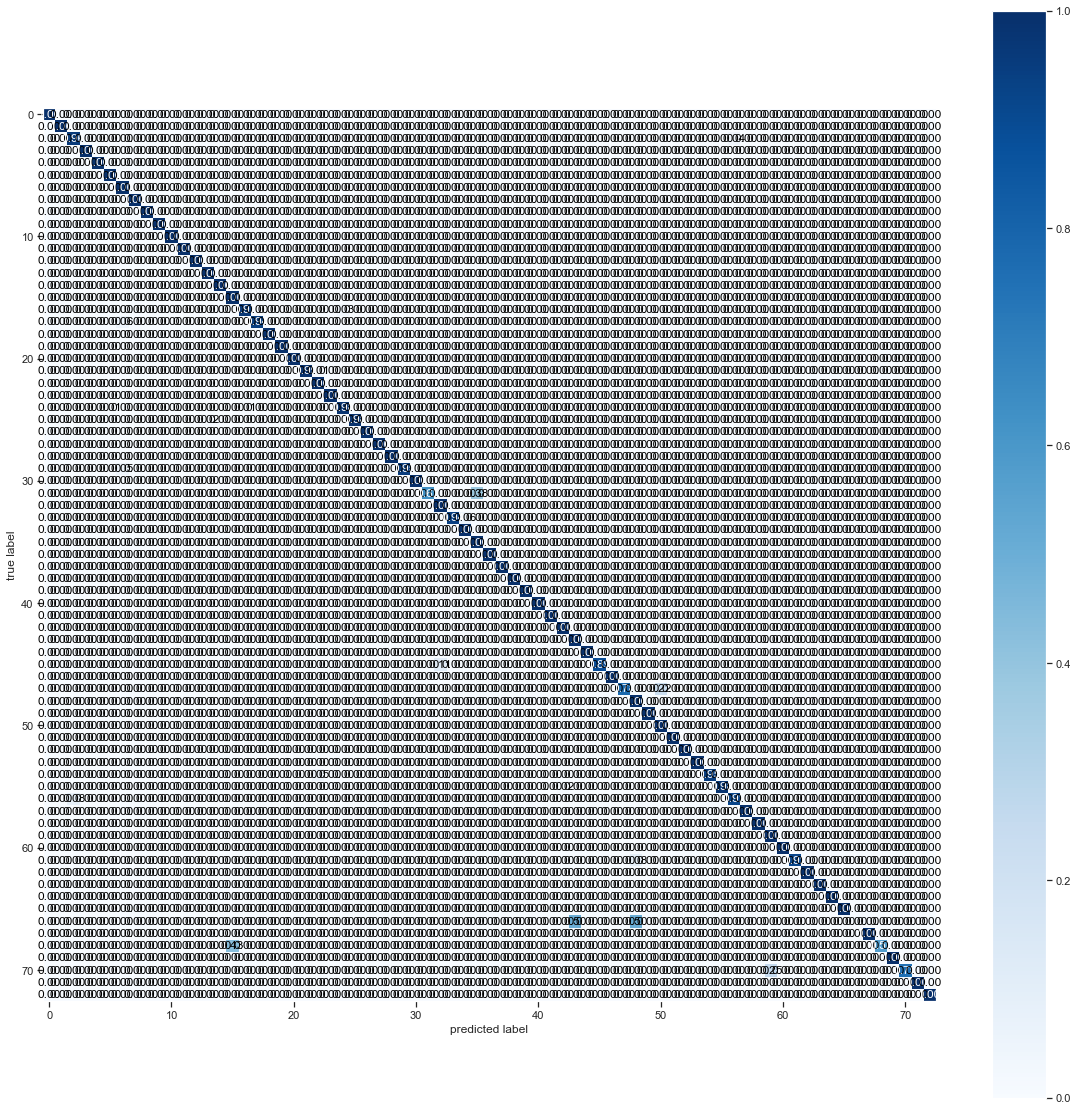

In [37]:
print("Confusion Matrix Plot")
fig, ax = plot_confusion_matrix(conf_mat=cm,
                                colorbar=True,
                                show_absolute=False,
                                show_normed=True,
                               figsize=(20, 20))
plt.show()

In [38]:
print("Classification Report")
print(classification_report(y_test,predicted))

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       168
           1       1.00      1.00      1.00        25
           2       0.99      0.96      0.97       117
           3       1.00      1.00      1.00       204
           4       1.00      1.00      1.00       239
           5       1.00      1.00      1.00       504
           6       0.95      1.00      0.97        77
           7       1.00      1.00      1.00        30
           8       1.00      1.00      1.00        14
           9       1.00      1.00      1.00       264
          10       1.00      1.00      1.00       102
          11       1.00      1.00      1.00         4
          12       1.00      1.00      1.00        33
          13       0.97      1.00      0.98        64
          14       1.00      1.00      1.00       374
          15       0.93      1.00      0.96        55
          16       0.98      0.97      0.97        86
     

C:\Users\drago\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [39]:
#Repeat with KFold - creating groups
kf = KFold(n_splits = 5, random_state = 4, shuffle = True)

#Print statement for debuging
# for train_index, test_index in kf.split(features_hc):
#     print("TRAIN:", train_index, "TEST:", test_index)
#     x_train, x_test = features_hc.iloc[train_index], features_hc.iloc[test_index]
#     y_train, y_test = target.iloc[train_index], target.iloc[test_index]

#Repeat with KFold - Training model (previously defined) and obtaining its output
kFoldTotal = 0
for k, (train_index, test_index) in enumerate(kf.split(features_hc)):
    x_train, x_test = features_hc.iloc[train_index], features_hc.iloc[test_index]
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]
    knn.fit(x_train, y_train)
    kFoldTotal += knn.score(x_test, y_test)
    print("[fold {0}] score: {1:.5f}".format(k, knn.score(x_test, y_test)))

#Printing out the results
roundedTotal = round(kFoldTotal/5, 5)
print("\nKNN mean score [5 folds] = " + str(roundedTotal))

[fold 0] score: 0.99750
[fold 1] score: 0.99450
[fold 2] score: 0.99600
[fold 3] score: 0.99500
[fold 4] score: 0.99750

KNN mean score [5 folds] = 0.9961
